# Primer Parcial IA 2S 2024 - Sobrino Camila

## **Ejercicio1**

Un instituto educativo está interesado en desarrollar un modelo que pueda **predecir si un estudiante tendrá un bajo rendimiento académico al final del año escolar**. El objetivo es identificar estudiantes que podrían necesitar apoyo adicional basado en una serie de características personales y académica.

El dataset contiene información sobre estudiantes en dos cursos de educación secundaria: Matemáticas y Portugués. Para este caso, **trabajaremos con los datos del curso de matemáticas. El objetivo es predecir si el estudiante aprobará o no el curso (clasificación binaria).**

Las características principales son:
- school: Escuela del estudiante (binary: "GP" o "MS").
- sex: Género del estudiante (binary: "F" = femenino o "M" = masculino).
- age: Edad del estudiante.
- address: Tipo de dirección (binary: "U" = urbana o "R" = rural).
- famsize: Tamaño de la familia (binary: "LE3" = menos o igual a 3, "GT3" = más de 3).
- Pstatus: Estado de cohabitación de los padres (binary: "T" = juntos, "A" = separados).
- Medu: Educación de la madre (numeric: 0 = sin educación, 1 = educación primaria, 2 = secundaria, 3 = terciaria, 4 = universitaria).
- Fedu: Educación del padre (numeric: 0 a 4).
- traveltime: Tiempo de viaje desde casa a la escuela (numeric: 1 = <15 min, 2 = 15-30 min, 3 = 30-60 min, 4 = >60 min).
- studytime: Tiempo semanal de estudio (numeric: 1 = <2 horas, 2 = 2-5 horas, 3 = 5-10 horas, 4 = >10 horas).
- failures: Número de clases fallidas (numeric: n si 1<=n<=3, más de 3 es 4).
- famsup: Apoyo educativo familiar (binary: yes o no).
- paid: Clases extras de pago (binary: yes o no).
- G1, G2, G3: Calificaciones obtenidas en los períodos 1, 2 y la calificación final (0-20).

Para este caso, nuestro objetivo (target) será clasificar a los estudiantes en dos grupos:
- Aprobado: G3 >= 10.
- Reprobado: G3 < 10.

### 1. EDA

1) Carga de Datos: Comience por cargar el conjunto de datos y realizar una exploracióninicial para comprender la naturaleza de los datos. ¿Cuántas características hay en el conjunto de datos? ¿Hay valores faltantes?¿Hay outliers? ¿Cómo está distribuida la variable objetivo?

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [17]:
data = pd.read_csv("student-mat.csv", delimiter=";")
print("Cargadas {0:d} observaciones con {1:d} columnas\n".format(len(data), len(data.columns)))

Cargadas 395 observaciones con 33 columnas



In [18]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [30]:
print(data.isnull().sum()) # --> No podeo Valores Nulos

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [20]:
data.describe(include = [object])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


In [23]:
data.describe(include = [np.number])

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### Análisis visual de variables y distribuciones.

C:\Users\cvsob\AppData\Local\Temp\ipykernel_17336\130123156.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[var], order=data[var].value_counts().index, palette='Set2')
C:\Users\cvsob\AppData\Local\Temp\ipykernel_17336\130123156.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[var], order=data[var].value_counts().index, palette='Set2')
C:\Users\cvsob\AppData\Local\Temp\ipykernel_17336\130123156.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[var], order=data[var].value_counts().index, palette='Set2')
C

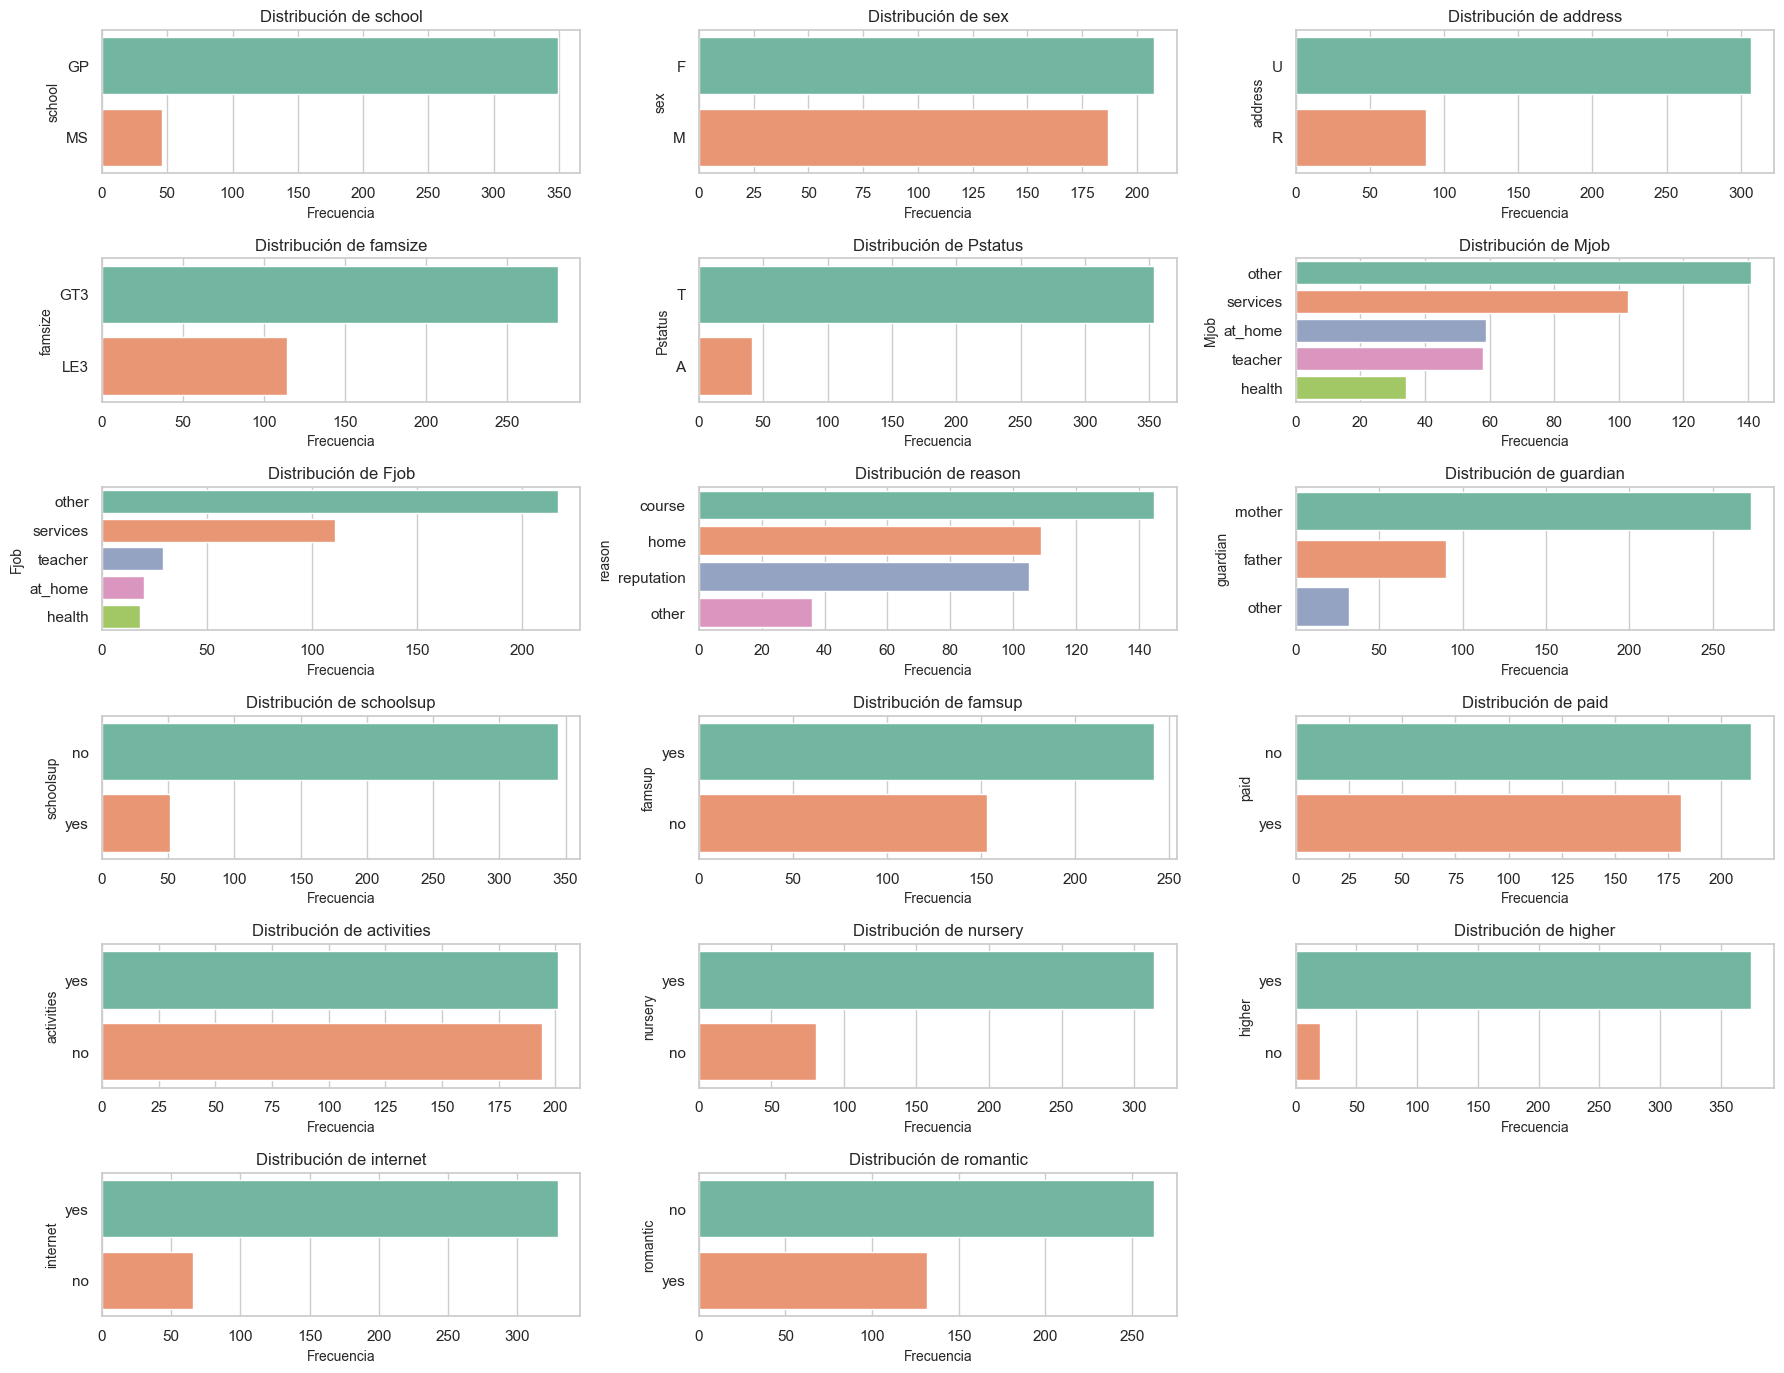

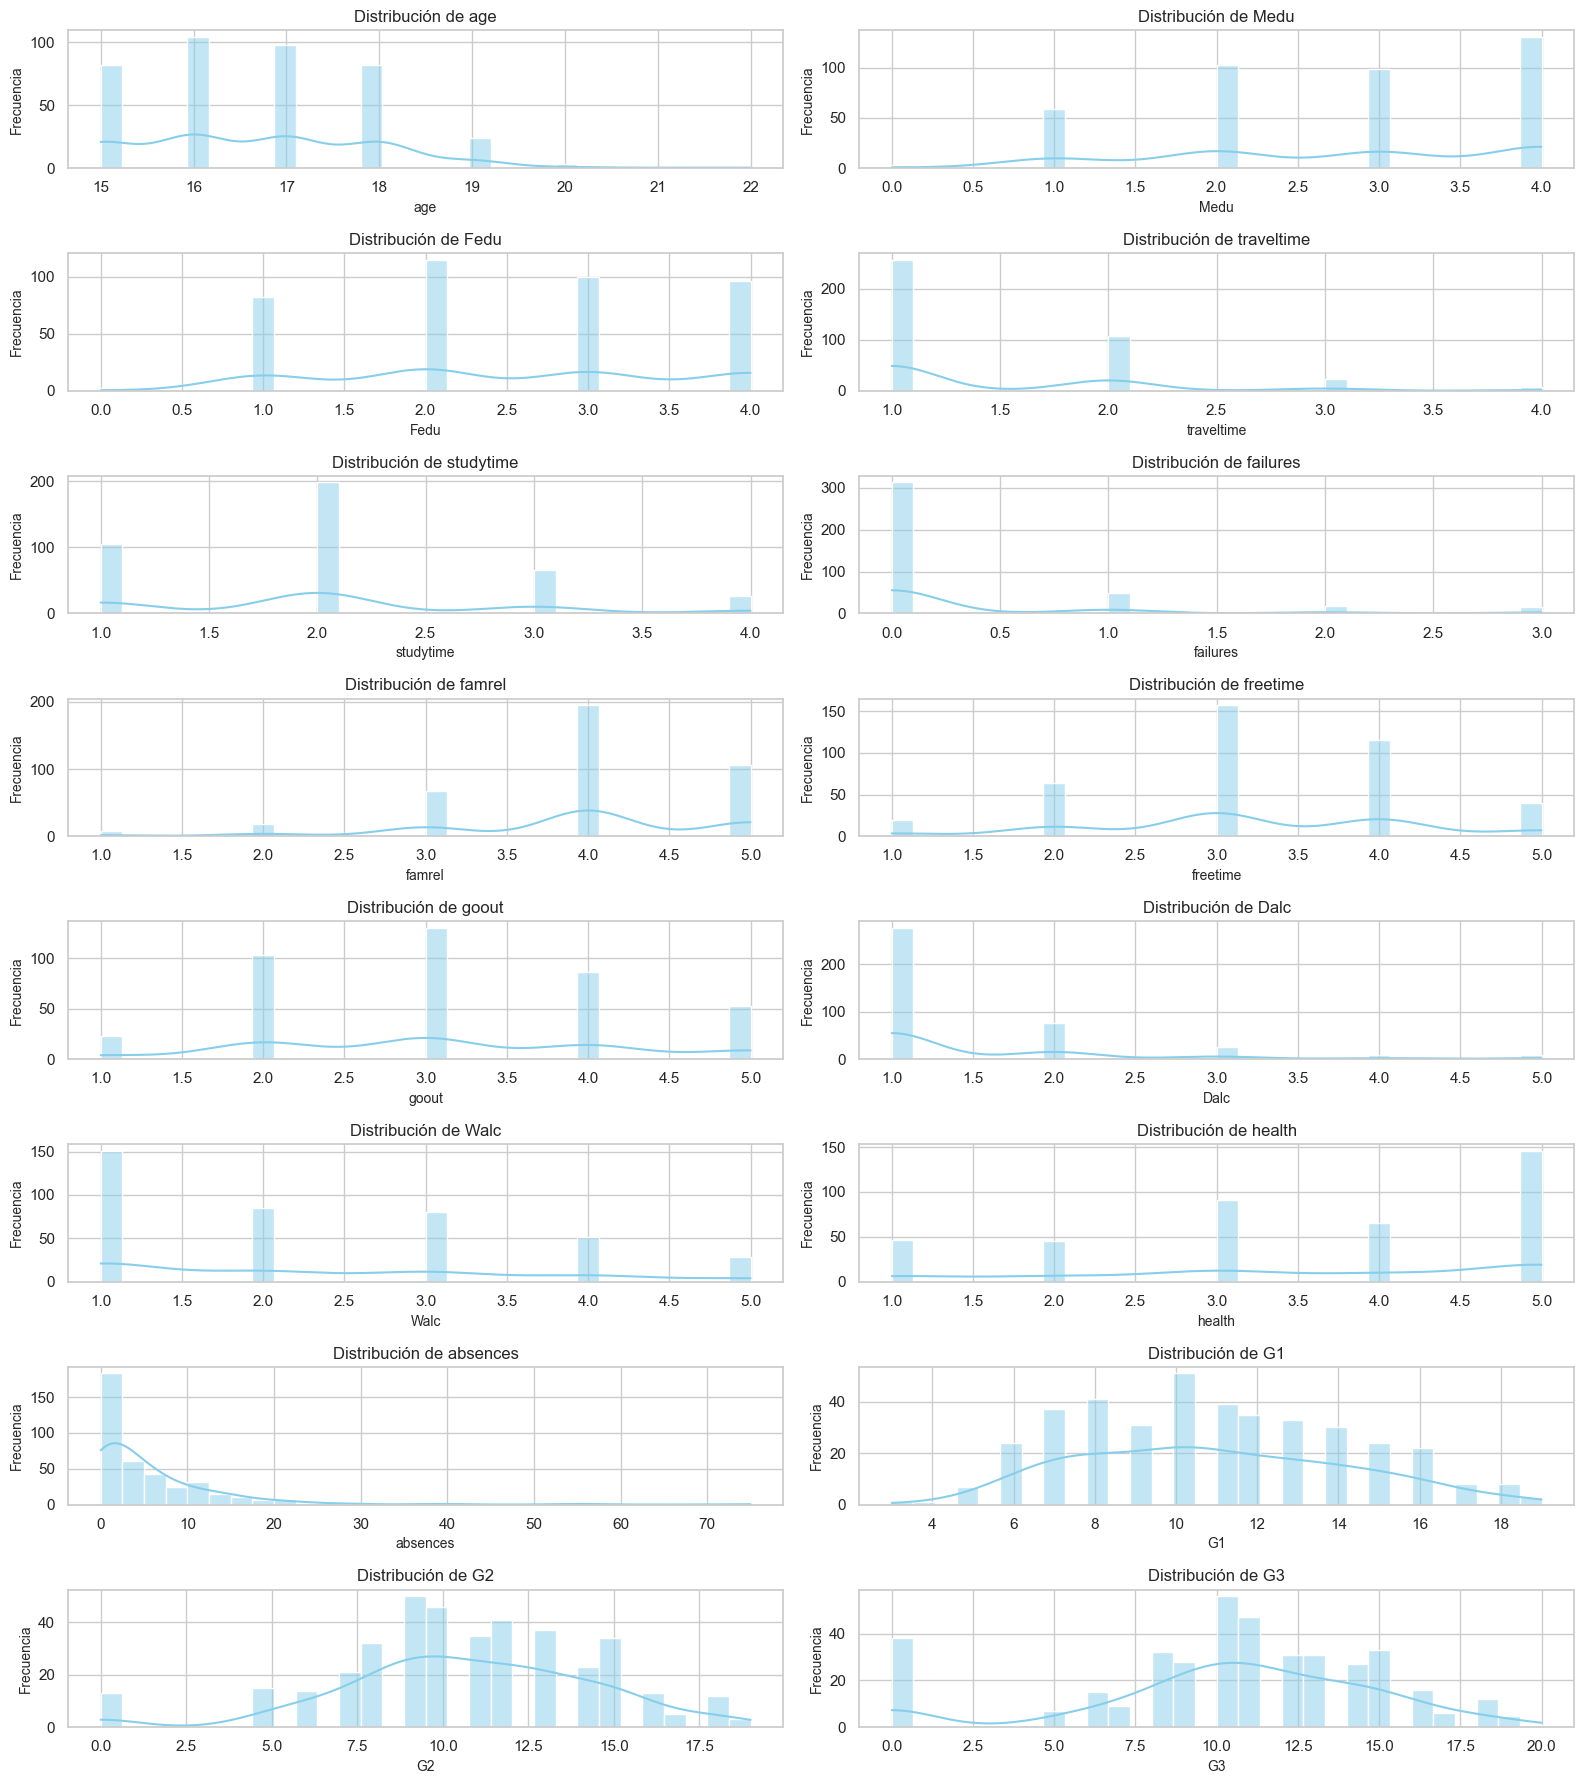

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el estilo de los gráficos
sns.set(style="whitegrid")

# Variables categóricas
categorical_vars = ['school','sex','address'	,'famsize'	,'Pstatus',	'Mjob'	,'Fjob'	,'reason'	,'guardian'	,'schoolsup',	'famsup','paid','activities','nursery','higher', 'internet','romantic']

# Variables numéricas
numerical_vars = ['age',	'Medu',	'Fedu',	'traveltime',	'studytime',	'failures',	'famrel'	,'freetime'	,'goout'	,'Dalc'	,'Walc'	,'health','absences',	'G1','G2','G3']

# Gráfico de variables categóricas
plt.figure(figsize=(18, 18))
for i, var in enumerate(categorical_vars):
    plt.subplot(8, 3, i+1)
    sns.countplot(y=data[var], order=data[var].value_counts().index, palette='Set2')
    plt.title(f'Distribución de {var}', fontsize=12)
    plt.xlabel('Frecuencia', fontsize=10)
    plt.ylabel(var, fontsize=10)
    
plt.tight_layout()
plt.show()

# Gráfico de variables numéricas
plt.figure(figsize=(16, 18))
for i, var in enumerate(numerical_vars):
    plt.subplot(8, 2, i+1)
    sns.histplot(data[var], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución de {var}', fontsize=12)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
    
plt.tight_layout()
plt.show()

Un par de conclusiones:

- School: la mayoría de los estudiantes provienen de la escuela GP, con una minoría significativa en la escuela MS.
- Sex: Hay una proporción ligeramente mayor de mujeres (F) en comparación con hombres (M) en la muestra.
- Address (Lugar de residencia): La mayoría de los estudiantes viven en áreas urbanas (U), mientras que una menor cantidad reside en áreas rurales (R).
- Famsize (Tamaño de la familia): La mayoría de los estudiantes provienen de familias con más de tres miembros (GT3), mientras que menos estudiantes tienen familias pequeñas (LE3).
- Pstatus (Estado civil de los padres): La mayoría de los estudiantes tienen padres que viven juntos (T), mientras que pocos tienen padres separados.
- Fjob (Ocupación del padre): La mayoría de los padres están en trabajos de tipo "otros", seguido por servicios. Un número pequeño de padres trabaja como profesores, en el hogar o en el sector salud.
- Mjob (Ocupación de la madre): Similar a los padres, las madres también tienden a estar en trabajos de tipo "otros", seguido por servicios y profesoras.
- Reason (Razón para elegir la escuela): La razón principal para elegir la escuela es la cercanía a casa (home), seguida por la reputación de la escuela.
- Guardian (Tutor): La mayoría de los estudiantes están bajo el cuidado de sus madres, seguido de padres, y un pequeño número tiene otro tutor.
- Schoolsup (Apoyo escolar): La mayoría de los estudiantes no reciben apoyo escolar adicional.
- Famsup (Apoyo familiar): La mayoría no recibe apoyo educativo adicional de la familia.
- Paid (Clases pagas): La mayoría de los estudiantes no paga clases adicionales.
- Activities (Actividades extracurriculares): Un mayor número de estudiantes no participa en actividades extracurriculares.
- Nursery (Asistencia a guardería): Una proporción mayor de estudiantes no asistió a guardería en su infancia.
- Higher (Interés por estudios superiores): La mayoría de los estudiantes tiene intención de seguir estudios superiores.
- Internet (Acceso a internet): La mayoría de los estudiantes tiene acceso a internet.
- Romantic (Relaciones románticas): Una proporción pequeña de estudiantes está en una relación romántica.

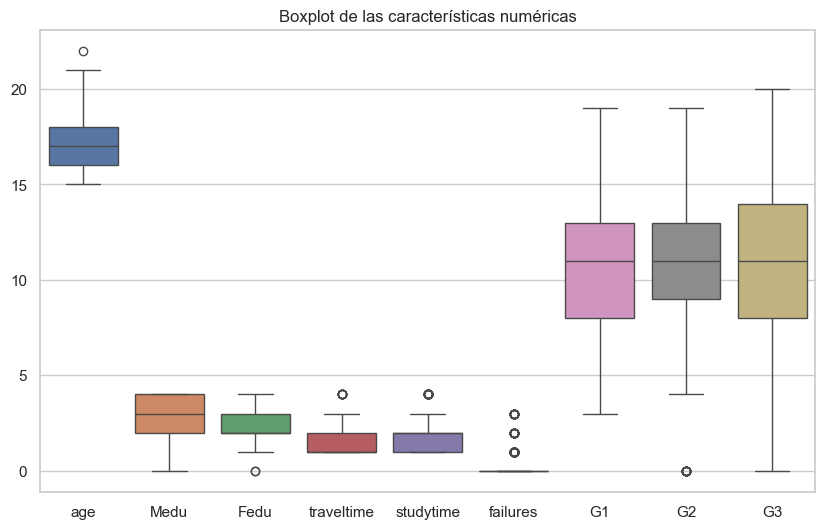

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'G1', 'G2', 'G3']])
plt.title("Boxplot de las características numéricas")
plt.show()

1. Age (Edad): La edad de los estudiantes se concentra entre los 15 y 19 años, con algunos outliers por encima de los 19 (hasta los 22 años).
2. Medu (Nivel educativo de la madre) y Fedu (Nivel educativo del padre): Estas variables tienen distribuciones similares, con valores principalmente entre 2 y 4 (parece representar niveles de educación). Hay algunos outliers en ambas distribuciones, especialmente en el nivel educativo del padre.
3. Traveltime (Tiempo de viaje) y Studytime (Tiempo de estudio): Estas variables están muy concentradas en los valores más bajos, indicando que la mayoría de los estudiantes tienen tiempos cortos de viaje y dedicación al estudio. Sin embargo, hay algunos outliers en ambas.
4. Failures (Número de fracasos escolares): La mayoría de los estudiantes no tienen fracasos (0), pero hay algunos outliers que tienen hasta 3 fracasos.
5. G1, G2, G3 (Notas en diferentes evaluaciones): Las notas parecen estar distribuidas en rangos medios (5-15), con pocos outliers. La dispersión es mayor en G3, lo que indica más variabilidad en las notas finales.

#### A continuacion voy a ejecutar un Arbol de decision que es robusto a outliers por lo cual decido sacarlos.

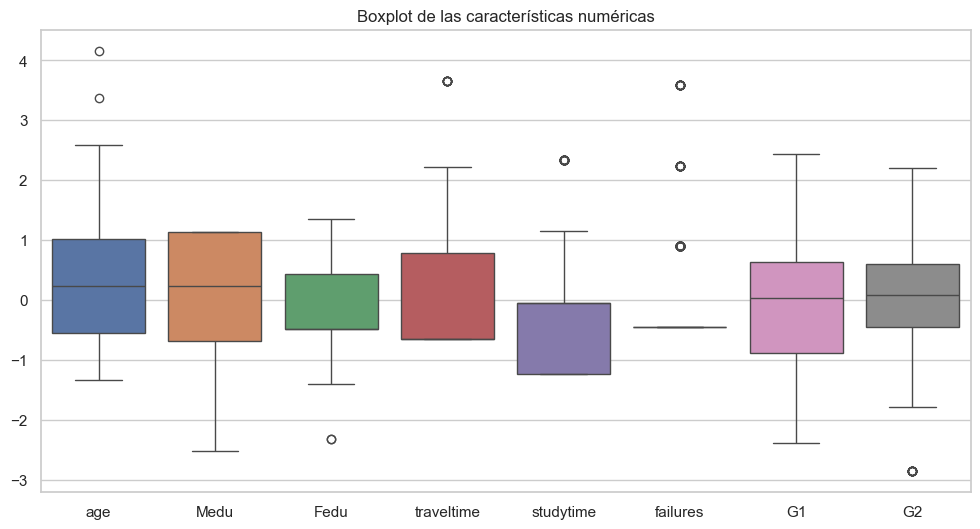

Número de outliers por columna:
age            2
Medu           0
Fedu           2
traveltime     8
studytime     27
failures      83
G1             0
G2            13
dtype: int64


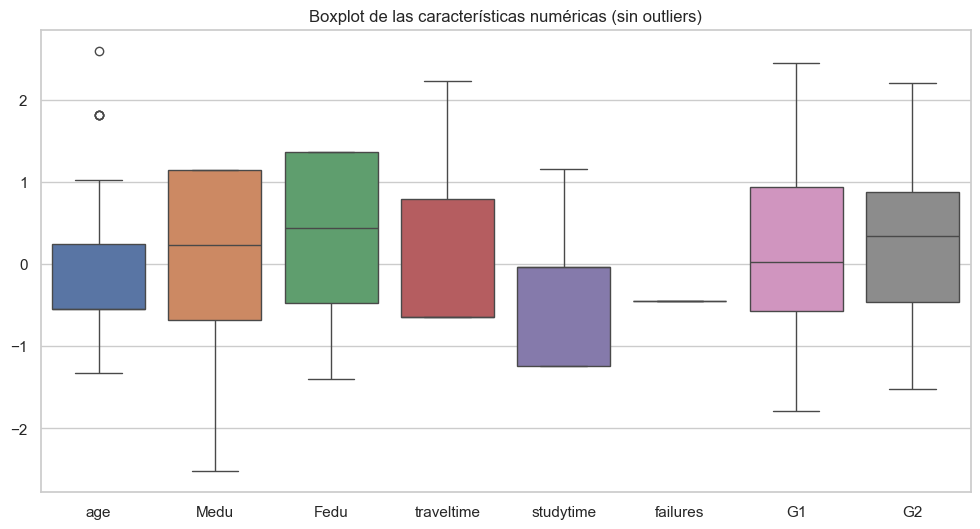

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot de las características numéricas
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'G1', 'G2']])
plt.title('Boxplot de las características numéricas')
plt.show()

# Calcular límites para detección de outliers
Q1 = data[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'G1', 'G2']].quantile(0.25)
Q3 = data[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'G1', 'G2']].quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers
outliers = ((data[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'G1', 'G2']] < (Q1 - 1.5 * IQR)) | (data[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'G1', 'G2']] > (Q3 + 1.5 * IQR)))

# Ver cuántos outliers hay en cada columna
outliers_sum = outliers.sum()
print("Número de outliers por columna:")
print(outliers_sum)

# Si se quiere eliminar los outliers:
data_clean = data[~((data[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'G1', 'G2']] < (Q1 - 1.5 * IQR)) | (data[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'G1', 'G2']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Boxplot después de eliminar outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_clean[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'G1', 'G2']])
plt.title('Boxplot de las características numéricas (sin outliers)')
plt.show()

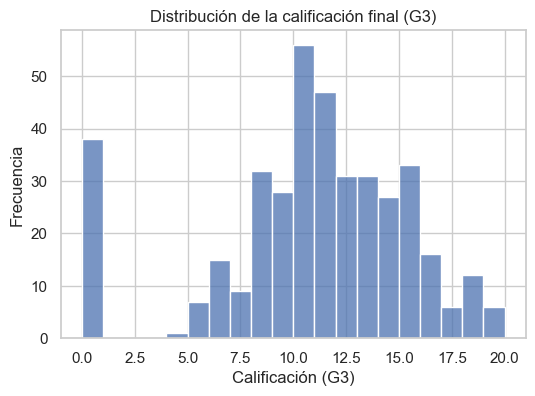

In [31]:
# Histograma de la variable G3 (calificación final)
plt.figure(figsize=(6, 4))
sns.histplot(data['G3'], bins=20, kde=False)
plt.title('Distribución de la calificación final (G3)')
plt.xlabel('Calificación (G3)')
plt.ylabel('Frecuencia')
plt.show()

A partir de la distribución, se pueden hacer las siguientes conclusiones:

- Moda alrededor de 10: El mayor número de estudiantes obtuvo una calificación alrededor de 10, lo que indica que la mayoría tuvo un desempeño intermedio.

- Distribución asimétrica: Se observa una ligera asimetría hacia la derecha. Aunque la mayor concentración de notas está entre 7.5 y 12.5, hay varios estudiantes que lograron calificaciones más altas, entre 15 y 20.

- Presencia de notas muy bajas (0): Un grupo considerable de estudiantes recibió una calificación de 0, lo que podría representar ausencias en el examen final o un desempeño extremadamente bajo.

- Pocos estudiantes con calificaciones perfectas: Muy pocos estudiantes alcanzaron la calificación máxima de 20, lo que sugiere que es difícil obtener una nota perfecta en este grupo.

### 2.
Preprocesamiento de los datos:
- Conversión de la variable objetivo: Convertimos la columna G3 en una
variable binaria, donde 1 representa que el estudiante aprobó (G3 >= 10) y 0
que reprobó (G3 < 10).
- Realice las tareas de preprocesamiento necesarias, como la codificación de
variables categóricas y el escalado de características numéricas.
- Asegúrese de dividir el conjunto de datos en conjuntos de entrenamiento y
prueba.

In [32]:
data['pass'] = (data['G3'] >= 10).astype(int)
data = data.drop(columns=['G3'])

In [62]:
# Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

# 1. Seleccionar las variables predictoras (X) y la variable objetivo (y)
# Aquí excluimos 'G3' ya que es la variable que queremos predecir
X = data.drop('G3', axis=1)
y = data['G3']

# 2. Identificar las variables categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# 3. Aplicar OneHotEncoder a las variables categóricas
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))

# Asegurarse de mantener el índice del dataframe original
X_encoded.index = X.index

# 4. Unir las columnas codificadas con las variables numéricas originales
X = X.drop(categorical_cols, axis=1)  # Eliminar las columnas categóricas originales
X = pd.concat([X, X_encoded], axis=1)  # Combinar las variables codificadas con las numéricas

# 5. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Crear y entrenar el modelo de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# 7. Predecir y evaluar el modelo
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')

# Opcional: Mostrar la importancia de las características
importances = tree_model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance:.4f}')


ImportError: cannot import name '_ravel' from 'sklearn.utils._array_api' (C:\Users\cvsob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_array_api.py)

In [33]:
data = pd.get_dummies(data, drop_first=True)
print(data.head())

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...                1               0              1           0   
1     1  ...                0               0              0           1   
2     2  ...                1               0              1           0   
3     1  ...                1               0              0           1   
4     1  ...                0               0              0           1   

   paid_yes  activities_yes  nursery_yes  higher_yes  internet

In [34]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'G1', 'G2']

scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

print(data[features_to_scale].head())

        age      Medu      Fedu  traveltime  studytime  failures        G1  \
0  1.023046  1.143856  1.360371    0.792251  -0.042286 -0.449944 -1.782467   
1  0.238380 -1.600009 -1.399970   -0.643249  -0.042286 -0.449944 -1.782467   
2 -1.330954 -1.600009 -1.399970   -0.643249  -0.042286  3.589323 -1.179147   
3 -1.330954  1.143856 -0.479857   -0.643249   1.150779 -0.449944  1.234133   
4 -0.546287  0.229234  0.440257   -0.643249  -0.042286 -0.449944 -1.480807   

         G2  
0 -1.254791  
1 -1.520979  
2 -0.722415  
3  0.874715  
4 -0.190038  


In [35]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['pass'])
y = data['pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. Entrenamiento de un modelo de clasificación: 
Entrena 2 modelos de clasificación, para predecir si un estudiante aprobará o no. Ajuste los hiperparámetros de cada modelo de
manera adecuada.


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Entrenar un árbol de decisión
tree = DecisionTreeClassifier(random_state=42)

# Ajustar hiperparámetros con GridSearchCV
params = {'max_depth': [3, 5, 7, 10]}
grid_tree = GridSearchCV(tree, param_grid=params, cv=5)
grid_tree.fit(X_train, y_train)

# Imprimir la mejor profundidad del árbol
print(f"Mejor profundidad del árbol: {grid_tree.best_params_['max_depth']}")


ImportError: cannot import name '_ravel' from 'sklearn.utils._array_api' (C:\Users\cvsob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_array_api.py)

### Modelo 2: Regresión Logística

In [46]:
from sklearn.linear_model import LogisticRegression

# Entrenar una regresión logística
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Imprimir los coeficientes del modelo
print("Coeficientes del modelo:", logreg.coef_)


AttributeError: module 'scipy.sparse' has no attribute 'linalg'

### Paso 4: Evaluación de Modelos

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluación del árbol de decisión
y_pred_tree = grid_tree.predict(X_test)
print("Resultados del Árbol de Decisión:")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Evaluación de la regresión logística
y_pred_logreg = logreg.predict(X_test)
print("Resultados de la Regresión Logística:")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

## 4. Evaluación de Modelos

## 5. Conclusiones: Proporcione conclusiones finales basadas en el rendimiento de los modelos.
¿Cuál es el modelo que mejor se desempeña en este problema y por qué?

# **Ejercicio 2 - Redes Neuronales**: 

Deberá crear una variable de dos tipos distintos utilizando la función **make_circles** de sklearn, y crear una RNA que permita clasificar dicha variable. Luego de crear la RNA, deberá utilizarla para predecir 10 casos al azar. Explique qué tan precisa será dicha RNA, justificando su respuesta. 

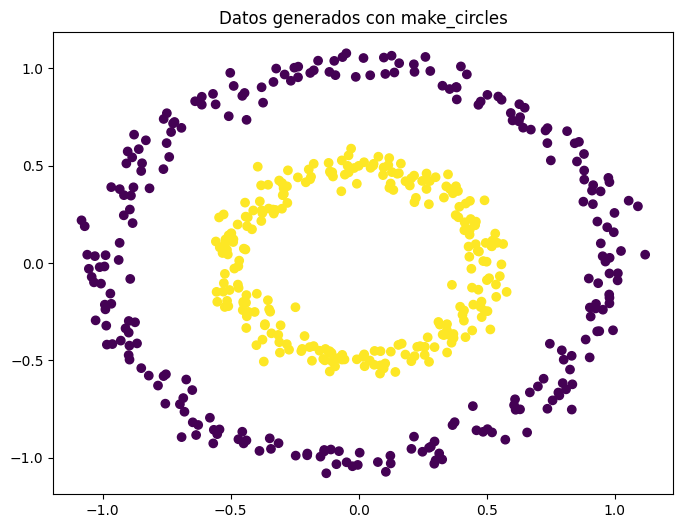

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.viridis)
plt.title("Datos generados con make_circles")
plt.show()

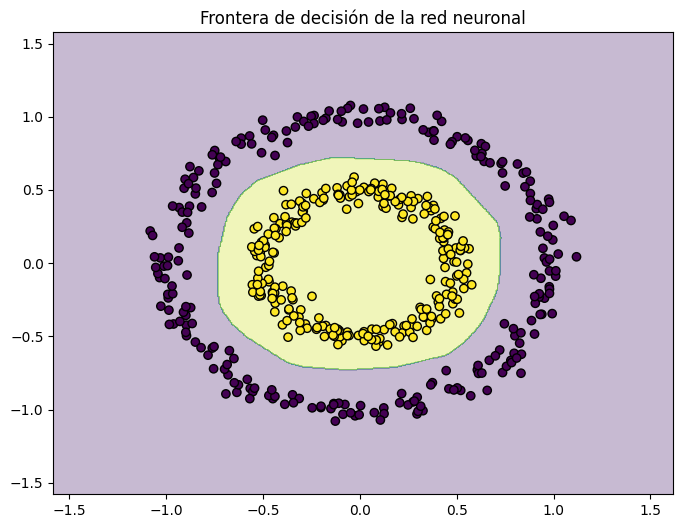

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(30, 30), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

indices = np.random.choice(len(X_test), 10, replace=False)
X_random = X_test[indices]
y_random = y_test[indices]

predicciones = mlp.predict(X_random)

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 500),
                     np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 500))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.viridis)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.viridis, edgecolor='k')
plt.title("Frontera de decisión de la red neuronal")
plt.show()

**Explicación**: el rendimiento de la clasificación es correcta y la precisión de esta red neuronal depende de los parámetros, como el número de capas ocultas (ej 30 que utilicé en este caso) y el número de neuronas en cada capa. "MLP es capaz de clasificar bien datos no lineales como los generados por make_circles gracias a su capacidad para aprender relaciones no lineales como en este caso"